# _Computer Vision - Bilgisayarın Gözü - Bilgisayarlı Görü_

_Bugün Computer Vision ve Yüz Tanıma Sistemlerini derinlemesine öğreneceğiz._

#### _Computer Vision_

In [1]:
# pip install opencv-python

In [1]:
# OpenCV kütüphanesini yükler; görüntü işleme ve bilgisayarlı görme işlemleri için gereklidir

_DRY - Do not repeat yourself_ <br>
_Do not delete anything (Yazılan kodu asla silemeyiz. Yorum satırına alırırız. Sonradan lazım oluyor.)_

In [2]:
import cv2
# OpenCV kütüphanesini bilgisayarla görme ve görüntü işlemleri için içe aktarır

import numpy as np
# Sayısal işlemler ve matris hesaplamaları için NumPy kütüphanesini dahil eder

In [3]:
resim = cv2.imread('input.jpg')
# input.jpg dosyasını okuyarak resim değişkenine yükler

cv2.imshow('Hello World', resim)
# Resmi 'Hello World' başlığıyla kısa süreli olarak ekranda gösterir

cv2.waitKey()
# Klavyeden herhangi bir tuşa basana kadar resmi açık tutar

cv2.destroyAllWindows()
# Açılan tüm OpenCV pencerelerini kapatır
# Alt + Tab ile açılan resmi görüntüledim ve space tuşuna basarak kapattım
# Kullanıcı deneyimi açıklaması: resmi görüntüledikten sonra manuel olarak kapattım

In [4]:
resim.shape

# Resmin boyutlarını döndürür: (satır sayısı, sütun sayısı, renk kanalı sayısı)
# Bu örnekte 830 satır, 1245 sütun ve 3 renk kanalı (BGR) vardır

(830, 1245, 3)

In [5]:
resim

# Resim verilerini ekranda gösterir; bilgisayar için her piksel renk değerleri sayısal (0-255) olarak temsil edilir

array([[[12, 18, 31],
        [12, 18, 31],
        [11, 17, 30],
        ...,
        [21, 24, 38],
        [21, 24, 38],
        [21, 24, 38]],

       [[12, 18, 31],
        [12, 18, 31],
        [12, 18, 31],
        ...,
        [21, 24, 38],
        [21, 24, 38],
        [21, 24, 38]],

       [[12, 18, 31],
        [12, 18, 31],
        [12, 18, 31],
        ...,
        [21, 24, 38],
        [21, 24, 38],
        [21, 24, 38]],

       ...,

       [[ 4,  7, 12],
        [ 4,  7, 12],
        [ 3,  7, 12],
        ...,
        [18, 23, 38],
        [19, 24, 39],
        [20, 25, 40]],

       [[ 3,  6, 11],
        [ 3,  6, 11],
        [ 3,  6, 11],
        ...,
        [18, 23, 38],
        [19, 24, 39],
        [20, 25, 40]],

       [[ 3,  6, 11],
        [ 3,  6, 11],
        [ 2,  5, 10],
        ...,
        [18, 23, 38],
        [18, 23, 38],
        [19, 24, 39]]], dtype=uint8)

In [6]:
import matplotlib.pyplot as plt
# Grafik çizimleri için matplotlib kütüphanesini dahil eder

checkboard = np.zeros((9,9))
# 9x9 boyutunda sıfırlardan oluşan bir matris oluşturur

checkboard[0::2,1::2] = 1
# Çift satırlarda tek sütunlara 1 değerini atayarak dama tahtası deseni başlatır

checkboard[1::2,0::2] = 1
# Tek satırlarda çift sütunlara 1 değerini atayarak dama tahtası desenini tamamlar

print(checkboard)
# Oluşan 9x9 dama tahtası matrisini ekrana yazdırır

[[0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]]


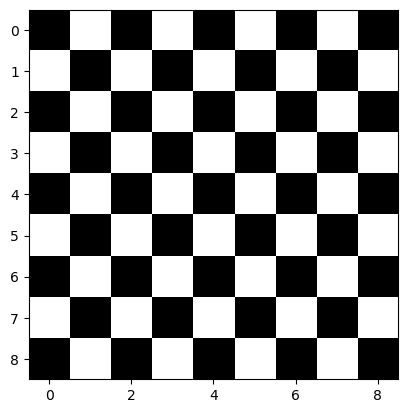

In [7]:
plt.imshow(checkboard, cmap='gray', interpolation='nearest');

# Dama tahtası matrisini gri tonlamalı bir resim olarak ekranda gösterir

In [8]:
from skimage import data
# skimage kütüphanesinden örnek veri setlerini içe aktarır

bush = data.lfw_subset()
# LFW (Labeled Faces in the Wild) veri setinin bir alt kümesini bush değişkenine yükler

bush = bush[0,:,:]
# İlk kişinin yüz görüntüsünü seçer ve tek boyutlu matris olarak saklar

bush
# Seçilen yüz görüntüsünü ekranda veya notebook'ta gösterir

array([[0.28888887, 0.32941177, 0.38039216, 0.50326794, 0.47973856,
        0.50457519, 0.55947715, 0.54901963, 0.56732029, 0.57516342,
        0.59738559, 0.61307186, 0.59607846, 0.56078434, 0.54248363,
        0.49281046, 0.45359477, 0.44183007, 0.2522876 , 0.23529412,
        0.4261438 , 0.49673203, 0.72418302, 0.69934636, 0.43529412],
       [0.29411766, 0.33333334, 0.44052288, 0.52026147, 0.49934641,
        0.53464049, 0.55424833, 0.59869283, 0.6156863 , 0.61960787,
        0.620915  , 0.63660127, 0.62875813, 0.6326797 , 0.59215689,
        0.52418303, 0.47581699, 0.44705883, 0.34640524, 0.32287583,
        0.33202612, 0.59738559, 0.81830066, 0.77777773, 0.27843139],
       [0.35294119, 0.41568628, 0.42745098, 0.48104575, 0.50457519,
        0.52287579, 0.53594774, 0.63529414, 0.65359479, 0.620915  ,
        0.61830068, 0.64444441, 0.61830068, 0.61830068, 0.60000002,
        0.53856206, 0.46405229, 0.43137255, 0.37254903, 0.37908494,
        0.29411766, 0.50065356, 0.60915029, 0.

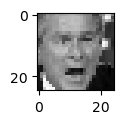

In [9]:
plt.figure(figsize=(1,1))
# Görüntü boyutunu 1x1 inç olarak ayarlar

plt.imshow(bush, cmap='gray');
# bush matrisini gri tonlamalı olarak ekranda gösterir

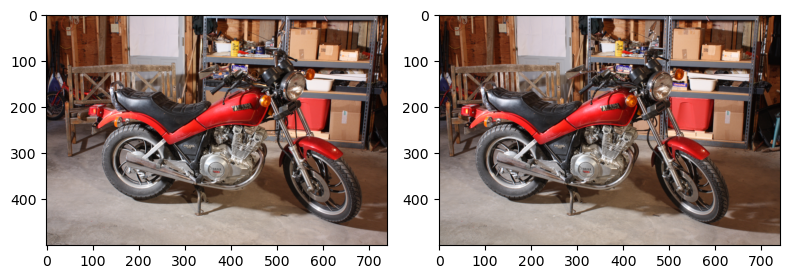

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# 1 satır ve 2 sütundan oluşan bir subplot figürü oluşturur, boyut 8x4 inç

ax = axes.ravel()
# 2D axes dizisini 1D array'e çevirir, kolay indeksleme için

cycle_images = data.stereo_motorcycle()
# skimage'den stereo_motorcycle örnek görüntüleri yükler

ax[0].imshow(cycle_images[0])
# İlk stereo görüntüyü ilk subplot'ta gösterir

ax[1].imshow(cycle_images[1])
# İkinci stereo görüntüyü ikinci subplot'ta gösterir

fig.tight_layout()
# Subplotların birbirine girmemesi için düzeni sıkıştırır

plt.show()
# Tüm subplotları ekranda gösterir

In [11]:
cycle_images

# stereo_motorcycle veri setindeki iki görüntüyü gösterir; her biri farklı açılardan motosiklet fotoğrafıdır

(array([[[127,  79,  53],
         [134,  83,  56],
         [135,  82,  51],
         ...,
         [ 54,  22,   7],
         [ 58,  31,  18],
         [ 58,  22,  13]],
 
        [[126,  78,  48],
         [128,  82,  51],
         [130,  80,  48],
         ...,
         [ 56,  22,   2],
         [ 55,  31,  20],
         [ 95,  43,  24]],
 
        [[122,  76,  50],
         [127,  78,  50],
         [130,  78,  46],
         ...,
         [ 41,  16,   3],
         [ 37,  27,  19],
         [ 89,  51,  28]],
 
        ...,
 
        [[138, 131, 130],
         [141, 131, 130],
         [152, 140, 135],
         ...,
         [166, 145, 137],
         [165, 142, 132],
         [163, 138, 131]],
 
        [[151, 144, 141],
         [141, 132, 127],
         [137, 126, 121],
         ...,
         [167, 143, 135],
         [167, 143, 133],
         [165, 142, 131]],
 
        [[145, 136, 135],
         [138, 132, 130],
         [130, 122, 122],
         ...,
         [165, 142, 132],
  

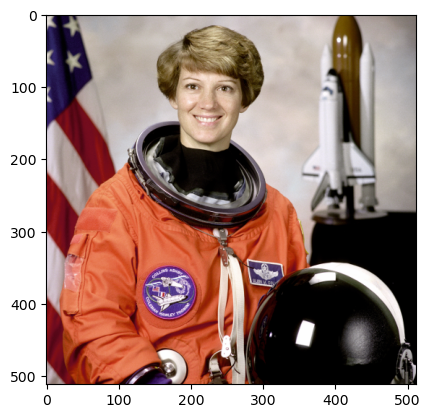

In [12]:
ast = data.astronaut()
# skimage kütüphanesinden astronaut örnek görüntüsünü yükler

plt.imshow(ast);
# astronaut görüntüsünü ekranda renkli olarak gösterir

In [13]:
image = cv2.imread('input.jpg')
# input.jpg dosyasını okuyarak image değişkenine yükler

sb = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Orijinal renkli görüntüyü siyah-beyaz (grayscale) formata çevirir

cv2.imshow('Original', image)
# Orijinal renkli resmi 'Original' başlığıyla ekranda gösterir

cv2.waitKey()
# Resim açık kalır, kapatmak için bir tuşa basılmasını bekler

cv2.imshow('SiyahBeyaz', sb)
# Siyah-beyaz görüntüyü 'SiyahBeyaz' başlığıyla ekranda gösterir

cv2.waitKey()
# Siyah-beyaz pencerenin kapanmaması için tuşa basılmasını bekler

cv2.destroyAllWindows()
# Açılmış tüm OpenCV pencerelerini kapatır

In [14]:
# yukarıdaki kodun daha kısa versiyonu;

In [15]:
sb = cv2.imread('input.jpg', 0)
# input.jpg dosyasını siyah-beyaz (grayscale) olarak okuyup sb değişkenine atar

cv2.imshow('SiyahBeyaz', sb)
# Siyah-beyaz resmi 'SiyahBeyaz' başlığıyla ekranda gösterir

cv2.waitKey()
# Resim açık kalır, kapatmak için bir tuşa basılmasını bekler

cv2.destroyAllWindows()
# Açılmış tüm OpenCV pencerelerini kapatır


In [16]:
import cv2
# OpenCV kütüphanesini içe aktarır

cap = cv2.VideoCapture(0)
# Bilgisayarın varsayılan kamerasını açar

while True:
    ret, frame = cap.read()
    # Kameradan bir kare (frame) okur, ret True/False döner

    sb = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Okunan kareyi siyah-beyaz (grayscale) formata çevirir

    if ret:
        cv2.imshow('Bendeniz', sb)
        # Siyah-beyaz kareyi 'Bendeniz' başlığıyla ekranda gösterir
    else:
        break
        # Kare okunamazsa döngüyü sonlandırır
        
    key = cv2.waitKey(1)
    # 1 ms bekler ve tuş basımlarını kontrol eder

    if key == ord('q'):
        break
        # 'q' tuşuna basılırsa döngüyü sonlandırır

cv2.destroyAllWindows()
# Açılan tüm OpenCV pencerelerini kapatır

In [17]:
import cv2
# OpenCV kütüphanesini içe aktarır

cap = cv2.VideoCapture('http:10.0.0.163:8080/video')
# IP kamera üzerinden video akışını başlatır

while True:
    ret, frame = cap.read()
    # Video akışından bir kare okur, ret True/False döner

    if ret:
        cv2.imshow('benkendim', frame)
        # Okunan kareyi 'benkendim' başlığıyla ekranda gösterir

    else:
        break
        # Kare okunamazsa döngüyü sonlandırır

    key = cv2.waitKey(1)
    # 1 ms bekler ve tuş basımlarını kontrol eder

    if key == ord('q'):
        break
        # 'q' tuşuna basılırsa döngüyü sonlandırır

cv2.destroyAllWindows()
# Açılan tüm OpenCV pencerelerini kapatır

In [18]:
img = cv2.imread('input.jpg')
# input.jpg dosyasını okuyarak img değişkenine atar

B, G, R = cv2.split(img)
# Resmin mavi, yeşil ve kırmızı kanallarını ayrı matrisler olarak ayırır

cv2.imshow('Red', R)
# Kırmızı kanal görüntüsünü 'Red' başlığıyla ekranda gösterir

cv2.imshow('Green', G)
# Yeşil kanal görüntüsünü 'Green' başlığıyla ekranda gösterir

cv2.imshow('Blue', B)
# Mavi kanal görüntüsünü 'Blue' başlığıyla ekranda gösterir

cv2.waitKey()
# Tüm pencerelerin kapanmadan önce tuşa basılmasını bekler

cv2.destroyAllWindows()
# Açılmış tüm OpenCV pencerelerini kapatır

In [19]:
img = cv2.imread('input.jpg')
# input.jpg dosyasını okuyarak img değişkenine yükler

B, G, R = cv2.split(img)
# Resmin mavi, yeşil ve kırmızı kanallarını ayrı matrisler olarak ayırır

cv2.imshow('Red', R)
# Kırmızı kanal görüntüsünü 'Red' başlığıyla ekranda gösterir

cv2.imshow('Green', G)
# Yeşil kanal görüntüsünü 'Green' başlığıyla ekranda gösterir

cv2.imshow('Blue', B)
# Mavi kanal görüntüsünü 'Blue' başlığıyla ekranda gösterir

cv2.waitKey()
# Pencerelerin kapanmadan önce tuşa basılmasını bekler

cv2.destroyAllWindows()
# Açılmış tüm OpenCV pencerelerini kapatır

merged = cv2.merge([B + 100, G, R + 100])
# Mavi ve kırmızı kanallara 100 değer ekleyerek renkli resmi yeniden birleştirir

cv2.imshow('Merged', merged)
# Yeni birleşmiş renkli resmi 'Merged' başlığıyla ekranda gösterir

cv2.waitKey()
# Pencerenin kapanmadan önce tuşa basılmasını bekler

cv2.destroyAllWindows()
# Açılan tüm OpenCV pencerelerini kapatır

#### _Otonom Araçların Yollarını Bulması (sobel, laplacion, canny)_

In [20]:
img.shape

# Resmin boyutlarını döndürür: (yükseklik, genişlik, renk kanalı sayısı)

(830, 1245, 3)

In [21]:
img = cv2.imread('input.jpg', 0)
# input.jpg dosyasını siyah-beyaz (grayscale) olarak okuyup img değişkenine atar

height, width = img.shape[:2]
# Resmin yüksekliğini ve genişliğini alır

sobel_x = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
# Sobel filtresi ile yatay kenarları tespit eder

sobel_y = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
# Sobel filtresi ile dikey kenarları tespit eder

cv2.imshow('sb', img)
# Orijinal siyah-beyaz resmi ekranda gösterir

cv2.waitKey()
# Pencerenin kapanmadan önce tuşa basılmasını bekler

cv2.imshow('Sobel X', sobel_x)
# Sobel X (yatay kenarlar) görüntüsünü ekranda gösterir

cv2.waitKey()
# Pencerenin kapanmadan önce tuşa basılmasını bekler

cv2.imshow('Sobel Y', sobel_y)
# Sobel Y (dikey kenarlar) görüntüsünü ekranda gösterir

cv2.waitKey()
# Pencerenin kapanmadan önce tuşa basılmasını bekler

cv2.destroyAllWindows()
# Açılan tüm OpenCV pencerelerini kapatır

In [22]:
img = cv2.imread('input.jpg', 0)
# input.jpg dosyasını siyah-beyaz (grayscale) olarak okuyup img değişkenine atar

height, width = img.shape[:2]
# Resmin yüksekliğini ve genişliğini alır

sobel_x = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
# Sobel filtresi ile yatay kenarları tespit eder

sobel_y = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
# Sobel filtresi ile dikey kenarları tespit eder

cv2.imshow('sb', img)
# Orijinal siyah-beyaz resmi ekranda gösterir

cv2.waitKey()
# Pencerenin kapanmadan önce tuşa basılmasını bekler

cv2.imshow('Sobel X', sobel_x)
# Sobel X (yatay kenarlar) görüntüsünü ekranda gösterir

cv2.waitKey()
# Pencerenin kapanmadan önce tuşa basılmasını bekler

cv2.imshow('Sobel Y', sobel_y)
# Sobel Y (dikey kenarlar) görüntüsünü ekranda gösterir

cv2.waitKey()
# Pencerenin kapanmadan önce tuşa basılmasını bekler

sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)
# Sobel X ve Sobel Y görüntülerini birleştirerek kenarları OR işlemiyle birleştirir

cv2.imshow('sobel_OR', sobel_OR)
# Sobel X ve Y'nin birleştirilmiş halini ekranda gösterir

cv2.waitKey(0)
# Pencerenin kapanmadan önce tuşa basılmasını bekler

laplacian = cv2.Laplacian(image, cv2.CV_64F)
# Laplacian filtresi ile görüntüdeki kenarları tespit eder

cv2.imshow('Laplacian', laplacian)
# Laplacian sonucu ekranda gösterir

cv2.waitKey(0)
# Pencerenin kapanmadan önce tuşa basılmasını bekler

canny = cv2.Canny(image, 50, 120)
# Canny kenar algılama ile kenarları tespit eder (eşik değerler 50 ve 120)

cv2.imshow('Canny', canny)
# Canny kenar algılama sonucunu ekranda gösterir

cv2.waitKey(0)
# Pencerenin kapanmadan önce tuşa basılmasını bekler

cv2.destroyAllWindows()
# Açılan tüm OpenCV pencerelerini kapatır

#### _Live Sketch_

In [23]:
import cv2
# OpenCV kütüphanesini içe aktarır

def sketch(image):
    # Canlı çizim efekti uygulayan fonksiyon tanımlar

    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Renkli görüntüyü siyah-beyaz (grayscale) formata çevirir

    img_gray_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
    # Gauss bulanıklığı uygulayarak görüntüyü yumuşatır

    canny_edges = cv2.Canny(img_gray_blur, 10, 70)
    # Canny kenar algılama ile kenarları tespit eder

    ret, mask = cv2.threshold(canny_edges, 250, 255, cv2.THRESH_BINARY_INV)
    # Kenarları ters binary (beyaz-kenar siyah) formata çevirir

    return mask

cap = cv2.VideoCapture(0)
# Bilgisayarın varsayılan kamerasını açar

while True:
    ret, frame = cap.read()
    # Kameradan bir kare okur

    cv2.imshow('Our live Sketcher', sketch(frame))
    # Canlı kareyi sketch fonksiyonu ile işleyip ekranda gösterir

    if cv2.waitKey(1) == 13:  # 13 enter demektir
        break
        # Enter tuşuna basıldığında döngüyü sonlandırır

cap.release()
# Kamera kaynağını serbest bırakır

cv2.destroyAllWindows()
# Açılan tüm OpenCV pencerelerini kapatır

print('done')
# İşlemin tamamlandığını ekrana yazdırır

done


#### _Load the Haar Cascade for face detection_

In [24]:
import cv2
# OpenCV kütüphanesini içe aktarır

# Yüz algılama için Haar Cascade sınıflandırıcısını yükler
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
# Bilgisayarın varsayılan kamerasını açar

while True:
    ret, frame = cap.read()
    # Kameradan bir kare okur

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Kareyi siyah-beyaz (grayscale) formata çevirir

    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    # Yüzleri algılar, scaleFactor=1.1 ve minNeighbors=4

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        # Algılanan yüzün etrafına mavi bir dikdörtgen çizer

    cv2.imshow('Face Tracking', frame)
    # Kareyi ekranda 'Face Tracking' başlığıyla gösterir

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        # 'q' tuşuna basıldığında döngüyü sonlandırır

cap.release()
# Kamera kaynağını serbest bırakır

cv2.destroyAllWindows()
# Açılan tüm OpenCV pencerelerini kapatır

#### _Where is waldo (Polis topluluk içerisinde aradığı kişiyi bulmak istiyor)_

In [25]:
image = cv2.imread('WaldoBeach.jpg')
# WaldoBeach.jpg dosyasını okuyarak image değişkenine atar

cv2.imshow('where is waldo?', image)
# Orijinal görüntüyü 'where is waldo?' başlığıyla ekranda gösterir

gray = cv2.imread('WaldoBeach.jpg', 0)
# WaldoBeach.jpg dosyasını siyah-beyaz (grayscale) olarak okur

waldo = cv2.imread('Waldo.jpg', 0)
# Waldo.jpg dosyasını siyah-beyaz olarak okur, şablon görüntü olarak kullanır

result = cv2.matchTemplate(gray, waldo, cv2.TM_CCOEFF)
# Template matching ile Waldo'yu arar, TM_CCOEFF metodu ile karşılaştırma yapar

minval, maxval, minloc, maxloc = cv2.minMaxLoc(result)
# En yüksek korelasyon değerini ve konumunu bulur

top_left = maxloc
# Waldo'nun sol üst köşe koordinatını alır

bottom_right = (top_left[0] + 50, top_left[1] + 50)
# Dikdörtgenin sağ alt köşe koordinatını belirler (50x50 piksel boyut)

cv2.rectangle(image, top_left, bottom_right, (0, 0, 255), 5)
# Waldo'nun bulunduğu yere kırmızı bir dikdörtgen çizer

cv2.imshow('where is waldo', image)
# Dikdörtgenli görüntüyü ekranda gösterir

cv2.waitKey()
# Pencerenin kapanmadan önce tuşa basılmasını bekler

cv2.destroyAllWindows()
# Açılan tüm OpenCV pencerelerini kapatır

#### _Selfie Çekmek_

In [26]:
selfie = cv2.VideoCapture(0).read()[1]
# Bilgisayarın varsayılan kamerasından bir kare (selfie) alır ve selfie değişkenine atar

cv2.imwrite('benkendim.jpg', selfie)
# Alınan selfie'yi benkendim.jpg olarak kaydeder

True

In [27]:
cap = cv2.VideoCapture('cars.mp4')
# cars.mp4 video dosyasını açar

while True:
    ret, frame = cap.read()
    # Videodan bir kare okur, ret True/False döner
    if ret:
        cv2.imshow('arabalar', frame)
        # Kareyi 'arabalar' başlığıyla ekranda gösterir
    else:
        break
        # Kare okunamazsa döngüyü sonlandırır

    key = cv2.waitKey(1)
    # 1 ms bekler ve tuş basımlarını kontrol eder

    if key == ord('q'):
        break
        # 'q' tuşuna basılırsa döngüyü sonlandırır

cv2.destroyAllWindows()
# Açılan tüm OpenCV pencerelerini kapatır

In [28]:
cap = cv2.VideoCapture(0)
# Bilgisayarın varsayılan kamerasını açar

ret1, frame1 = cap.read()
ret2, frame2 = cap.read()
# Kameradan iki kare okur, hareket algılaması için başlangıç olarak kullanılır

while True:
    frame1sb = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    frame2sb = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    # Kareleri siyah-beyaz (grayscale) formata çevirir

    diff = cv2.absdiff(frame1sb, frame2sb)
    # İki kare arasındaki mutlak farkı hesaplar (hareket algılama)

    cv2.imshow("Motion", diff)
    # Fark görüntüsünü ekranda 'Motion' başlığıyla gösterir

    frame1 = frame2

    ret, frame2 = cap.read()
    # Yeni kareyi oku ve frame1'i güncelle

    if not ret:
        cap.release()
        break
        # Kare okunamazsa kamerayı serbest bırak ve döngüyü kır

    key = cv2.waitKey(10)
    # 10 ms bekler ve tuş basımlarını kontrol eder

    if key == ord("q"):
        cap.release()
        break
        # 'q' tuşuna basılırsa kamerayı serbest bırak ve döngüyü kır

cv2.destroyAllWindows()
# Açılan tüm OpenCV pencerelerini kapatır

In [29]:
cap = cv2.VideoCapture('airplanes.mp4')
# airplanes.mp4 video dosyasını açar

ret1, frame1 = cap.read()
ret2, frame2 = cap.read()
# Videodan iki kare okur, hareket algılama başlangıcı için kullanılır

while True:
    frame1sb = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    frame2sb = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    # Kareleri siyah-beyaz (grayscale) formata çevirir

    diff = cv2.absdiff(frame1sb, frame2sb)
    # İki kare arasındaki mutlak farkı hesaplayarak hareketi tespit eder

    cv2.imshow("Motion", diff)
    # Fark görüntüsünü ekranda 'Motion' başlığıyla gösterir

    frame1 = frame2

    ret, frame2 = cap.read()
    # Yeni kareyi oku ve frame1'i güncelle

    if not ret:
        cap.release()
        break
        # Kare okunamazsa kamerayı/akışı serbest bırak ve döngüyü kır

    key = cv2.waitKey(10)
    # 10 ms bekler ve tuş basımlarını kontrol eder

    if key == ord("q"):
        cap.release()
        break
        # 'q' tuşuna basılırsa akışı durdur ve döngüyü kır

cv2.destroyAllWindows()
# Açılan tüm OpenCV pencerelerini kapatır

In [30]:
cap = cv2.VideoCapture("airplanes.mp4")
# airplanes.mp4 video dosyasını açar

ret1, frame1 = cap.read()
ret2, frame2 = cap.read()
# Videodan iki kare okur, hareket algılama için başlangıç kullanılır

while True:
    frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    # Kareleri siyah-beyaz (grayscale) formata çevirir

    frame1_blur = cv2.GaussianBlur(frame1_gray, (21,21), 0)
    frame2_blur = cv2.GaussianBlur(frame2_gray, (21,21), 0)
    # Kareleri bulanıklaştırarak küçük değişiklikleri azaltır

    diff = cv2.absdiff(frame1_blur, frame2_blur)
    # İki kare arasındaki farkı hesaplar

    thresh = cv2.threshold(diff, 20, 255, cv2.THRESH_BINARY)[1]
    # Farkı binary formata çevirir, eşik değeri 20

    final = cv2.dilate(thresh, None, iterations=2)
    # Binary görüntüyü genişleterek küçük boşlukları kapatır

    masked = cv2.bitwise_and(frame1, frame1, mask=thresh)
    # Hareket bölgelerini orijinal kare ile maskeler

    white_pixels = np.sum(thresh) / 255
    # Beyaz piksel sayısını hesaplar (hareket miktarı)

    rows, cols = thresh.shape
    total = rows * cols

    if white_pixels > 0.01 * total:
        # Beyaz pikseller toplam pikselin %1'inden fazla ise hareket var kabul edilir

        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame1, "Movement Detected - Hareket Var", (10,50), font, 1, (0,0,255), 2, cv2.LINE_AA)
        # Kareye uyarı metni ekler

    cv2.imshow("Motion", frame1)
    # Kareyi ekranda gösterir

    frame1 = frame2
    ret, frame2 = cap.read()
    # Yeni kareyi oku ve frame1'i güncelle

    if not ret:
        break
        # Kare okunamazsa döngüyü sonlandır

    key = cv2.waitKey(10)
    # 10 ms bekler ve tuş basımlarını kontrol eder

    if key == 27 or key == ord("q"):
        break
        # ESC veya 'q' tuşuna basılırsa döngüyü kır

cv2.destroyAllWindows()
# Açılan tüm OpenCV pencerelerini kapatır

#### _Yüz Tanıma_

In [31]:
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Haar Cascade sınıflandırıcısını yükler, yüz algılama için kullanılır

image = cv2.imread('myself.jpg')
# myself.jpg dosyasını okuyarak image değişkenine atar

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Renkli görüntüyü siyah-beyaz (grayscale) formata çevirir

faces = face_classifier.detectMultiScale(gray, 1.3, 5)
# Yüzleri algılar, scaleFactor=1.3 ve minNeighbors=5

if faces is ():
    print("No faces found")
    # Yüz algılanmazsa uyarı mesajı verir

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (127, 0, 255), 2)
    # Algılanan yüzün etrafına mor renkli bir dikdörtgen çizer

    cv2.imshow('Face Detection', image)
    # Dikdörtgenli yüz görüntüsünü ekranda gösterir

    cv2.waitKey(0)
    # Pencerenin kapanmadan önce tuşa basılmasını bekler

cv2.destroyAllWindows()
# Açılan tüm OpenCV pencerelerini kapatır

<>:13: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
C:\Users\13tua\AppData\Local\Temp\ipykernel_15796\1958416028.py:13: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
  if faces is ():


In [32]:
# Image resize : img=cv2.resize(image,(800,600))

In [33]:
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')
# Haar Cascade sınıflandırıcıları yüklenir, biri yüz diğeri göz algılama için

img = cv2.imread('myself.jpg')
# myself.jpg dosyasını okuyarak img değişkenine atar

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Renkli görüntüyü siyah-beyaz (grayscale) formata çevirir

faces = face_classifier.detectMultiScale(gray, 1.3, 5)
# Yüzleri algılar, scaleFactor=1.3 ve minNeighbors=5

if faces is ():
    print("No Face Found")
    # Eğer yüz algılanmazsa uyarı verir

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (127, 0, 255), 2)
    # Algılanan yüzün etrafına mor bir dikdörtgen çizer

    cv2.imshow('img', img)
    # Yüz dikdörtgenli görüntüyü ekranda gösterir

    cv2.waitKey(0)

    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    # Yüz bölgesini seçer, göz algılaması için

    eyes = eye_classifier.detectMultiScale(roi_gray)
    # Yüz bölgesinde gözleri algılar

    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (255, 255, 0), 2)
        # Algılanan gözlerin etrafına sarı dikdörtgen çizer

        cv2.imshow('img', img)
        # Göz dikdörtgenli görüntüyü ekranda gösterir

    cv2.waitKey(0)
    # Pencerenin kapanmadan önce tuşa basılmasını bekler

cv2.destroyAllWindows()
# Açılan tüm OpenCV pencerelerini kapatır

<>:14: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
C:\Users\13tua\AppData\Local\Temp\ipykernel_15796\1421170482.py:14: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
  if faces is ():


In [34]:
# Read image
image = cv2.imread("Sunflowers.jpg")
# Sunflowers.jpg dosyasını okuyarak image değişkenine atar

# Set up the detector with default parameters
detector = cv2.SimpleBlobDetector_create()
# SimpleBlobDetector ile blob (nokta/nesne) algılayıcı oluşturur

keypoints = detector.detect(image)
# Görüntüdeki blobları tespit eder

blank = np.zeros((1,1))
# Boş bir görüntü matrisi oluşturur, drawKeypoints için gerekli

blobs = cv2.drawKeypoints(image, keypoints, blank, (255,0,0),
                          cv2.DRAW_MATCHES_FLAGS_DEFAULT)
# Tespit edilen blobları kırmızı renk ile orijinal görüntü üzerinde gösterir

# Show keypoints
cv2.imshow("Blobs", blobs)
# Blobların olduğu görüntüyü 'Blobs' başlığıyla ekranda gösterir

cv2.waitKey(0)
# Pencerenin kapanmadan önce tuşa basılmasını bekler

cv2.destroyAllWindows()
# Açılan tüm OpenCV pencerelerini kapatır

In [35]:
# pip install opencv-contrib-python --user

In [36]:
face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
# Haar Cascade sınıflandırıcısını yükler, yüz algılama için kullanılır

def face_extractor(img):
    # Verilen görüntüden yüzü kesen fonksiyon

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Görüntüyü siyah-beyaz (grayscale) formata çevirir

    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    # Yüzleri algılar, scaleFactor=1.3 ve minNeighbors=5

    if faces is ():
        return None
        # Yüz bulunamazsa None döner

    for (x, y, w, h) in faces:
        cropped_face = img[y:y+h, x:x+w]
        # Algılanan yüzü keser

    return cropped_face

cap = cv2.VideoCapture(0)
# Bilgisayarın varsayılan kamerasını açar

count = 0

while True:
    ret, frame = cap.read()
    # Kameradan bir kare oku

    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame), (200, 200))
        # Yüzü 200x200 boyutuna getirir

        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        # Yüzü siyah-beyaz formata çevirir

        file_name_path = './faces/user/' + str(count) + '.jpg'
        cv2.imwrite(file_name_path, face)
        # Yüzü klasöre kaydeder

        cv2.putText(face, str(count), (50,50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        # Yüz üzerinde sayacı gösterir

        cv2.imshow("Face Cropper", face)
        # Yüzü ekranda gösterir

    else:
        print("Face not found")
        # Yüz bulunamazsa uyarı mesajı verir
        
        pass
    if cv2.waitKey(1) == 13 or count == 300:
        break
        # Enter tuşuna basıldığında veya 300 yüz kaydedildiğinde döngüyü kır

cap.release()
# Kamera kaynağını serbest bırakır

cv2.destroyAllWindows()
# Açılan tüm OpenCV pencerelerini kapatır

print('Collecting Samples complete')

import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

data_path = './faces/user/'
# Kaydedilen yüzlerin bulunduğu klasör yolu

onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]
# Klasördeki tüm dosya isimlerini listeler

Training_Data, Labels = [], []
for i, files in enumerate(onlyfiles):
    image_path = data_path + onlyfiles[i]
    images = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Yüz görüntüsünü siyah-beyaz olarak oku

    Training_Data.append(np.asarray(images, dtype=np.uint8))
    Labels.append(i)
    # Eğitim verilerini ve etiketlerini listelere ekler

Labels = np.asarray(Labels, dtype=np.int32)
# Etiketleri numpy array haline getirir

model = cv2.face.LBPHFaceRecognizer_create()
# LBPH (Local Binary Patterns Histograms) yüz tanıma modeli oluşturur

model.train(np.asarray(Training_Data), np.asarray(Labels))
# Modeli eğitim verileriyle eğitir

print("Model Trained Successfully")
# Modelin başarıyla eğitildiğini ekrana yazar

Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not f

In [37]:
face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
# Haar Cascade sınıflandırıcısını yükler, yüz algılama için kullanılır

def face_extractor(img, size=0.5):
    # Görüntüden yüzü tespit edip kırpar ve boyutlandırır

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Renkli görüntüyü siyah-beyaz formata çevirir

    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    # Yüzleri algılar, scaleFactor=1.3 ve minNeighbors=5

    if faces is ():
        return img, []
        # Yüz bulunamazsa orijinal görüntüyü ve boş liste döner

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)
        # Yüz etrafına sarı bir dikdörtgen çizer

        roi = img[y:y+h, x:x+w]
        roi = cv2.resize(roi, (200, 200))
        # Yüz bölgesini 200x200 boyutuna getirir

    return img, roi

cap = cv2.VideoCapture(0)
# Bilgisayarın varsayılan kamerasını açar

while True:
    ret, frame = cap.read()
    # Kameradan bir kare oku

    image, face = face_extractor(frame)
    # Yüzü algıla ve kareyi hazırla

    try:
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        # Yüzü siyah-beyaz formata çevir

        results = model.predict(face)
        # Eğitilmiş model ile yüzü tahmin et

        if results[1] < 500:
            confidence = int(100 * (1 - (results[1]) / 400))
            display_string = str(confidence) + '% sure this guy is myself'
            # Tahmin güvenini hesapla ve ekranda gösterilecek metni hazırla

        cv2.putText(image, display_string, (100, 120), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 120, 150), 2)
        # Güven skorunu görüntüye ekle

        if confidence > 75:
            cv2.putText(image, "Unlocked", (250, 450), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
            # Güven yüksekse 'Unlocked' mesajı

            cv2.imshow("Face Recognition", image)

        else:
            cv2.putText(image, "Locked", (250, 450), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
            # Güven düşükse 'Locked' mesajı

            cv2.imshow("Face Recognition", image)

    except:
        cv2.putText(image, "No Face Found", (220, 120), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
        cv2.putText(image, "Locked", (250, 450), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
        # Yüz algılanamazsa uyarı mesajları ekle

        cv2.imshow("Face Recognition", image)

    if cv2.waitKey(1) == 13:
        # Enter tuşuna basılırsa döngüyü kır
        cap.release()
        break

cap.release()
# Kamera kaynağını serbest bırak

cv2.destroyAllWindows()
# Açılan tüm OpenCV pencerelerini kapat

In [38]:
face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
# Haar Cascade sınıflandırıcısını yükler, yüz algılama için kullanılır

def face_extractor(img, size=0.5):
    # Verilen görüntüden yüzü tespit edip kırpar ve boyutlandırır

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Renkli görüntüyü siyah-beyaz (grayscale) formata çevirir

    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    # Yüzleri algılar, scaleFactor=1.3 ve minNeighbors=5

    if faces is ():
        return img, []
        # Yüz bulunamazsa orijinal görüntüyü ve boş liste döner

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)
        # Yüz etrafına sarı bir dikdörtgen çizer

        roi = img[y:y+h, x:x+w]
        roi = cv2.resize(roi, (200, 200))
        # Yüz bölgesini 200x200 boyutuna getirir

    return img, roi

cap = cv2.VideoCapture(0)
# Bilgisayarın varsayılan kamerasını açar